In [1]:
#以下是IRIS的代码
import numpy as np
import pandas as pd
raw_data=pd.read_csv('实验数据集/Iris数据集/iris.csv')

In [2]:
#展示数据
raw_data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [3]:
#看看有哪些类别
set(raw_data['Species'])

{'setosa', 'versicolor', 'virginica'}

In [4]:
import random

#创造两个类别之间的训练集和测试集
def get_dataset(class1,class2,raw_data):
    #换格式，增广化
    class1_data=raw_data[raw_data['Species']==class1]
    class1_data=np.array(class1_data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],dtype=float)[:,1:-1]
    class2_data=raw_data[raw_data['Species']==class2]
    class2_data=np.array(class2_data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],dtype=float)[:,1:-1]
    ones=np.ones((class1_data.shape[0],1))
    class1_data=np.concatenate((ones,class1_data,ones),axis=-1)
    class2_data=np.concatenate((ones,class2_data,-ones),axis=-1)
    random.shuffle(class1_data)
    random.shuffle(class2_data)

    #创造训练集与测试集
    train_set=np.concatenate((class1_data[0:30,:],class2_data[0:30,:]),axis=0)
    test_set=np.concatenate((class1_data[30:,:],class2_data[30:,:]),axis=0)
    random.shuffle(train_set)
    random.shuffle(test_set)

    return train_set,test_set


In [5]:
#下面是直接把感知器的代码搬过来
def pla(train_data,max_itera,random_init=False):
    if random_init==True:
        weight=np.random.normal(0,1,train_data.shape[1]-1)
    else:
        weight=np.array([2.,2.,2.])
    for i in range(max_itera):
        error=False
        for j in range(train_data.shape[0]):
            if np.dot(weight,train_data[j][0:-1])*train_data[j][-1]<0:
                error=True
                weight+=train_data[j][-1]*train_data[j][0:-1]
        if error==False:
            print('线性可分，找到分类面')
            return weight
        elif i==max_itera-1:
            error_rate=0
            for k in range(train_data.shape[0]):
                if np.dot(weight,train_data[k][0:-1])*train_data[j][-1]<0:
                    error_rate+=1
            print('未能找到分类面，正确率为：',1-error_rate/train_data.shape[0])
            return weight

In [8]:
#分别获取三个对应的训练集和测试集
train_set1,test_set1=get_dataset('setosa','versicolor',raw_data)
train_set2,test_set2=get_dataset('setosa','virginica',raw_data)
train_set3,test_set3=get_dataset('versicolor','virginica',raw_data)
#得到分类面
w12=pla(train_set1,200,random_init=True)
w13=pla(train_set2,200,random_init=True)
w23=pla(train_set3,200,random_init=True)

线性可分，找到分类面
线性可分，找到分类面
线性可分，找到分类面


In [9]:
#分别在三个测试集上测试
def eval(test_set1,test_set2,test_set3,w12,w13,w23):
    error=0
    for j in range(test_set1.shape[0]):
        vote=np.array([0,0,0])
        label=np.array([0,0,0])
        if np.dot(w12,test_set1[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[1]+=1
        if np.dot(w13,test_set1[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[2]+=1
        if np.dot(w23,test_set1[j][0:-1])>0:
            vote[1]+=1
        else:
            vote[2]+=1

        if test_set1[j][-1]==1:
            label[0]=1
        else:
            label[1]=1

        if int(np.argmax(vote))!=int(np.argmax(label)):
            error+=1
    
    for j in range(test_set2.shape[0]):
        vote=np.array([0,0,0])
        label=np.array([0,0,0])
        if np.dot(w12,test_set2[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[1]+=1
        if np.dot(w13,test_set2[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[2]+=1
        if np.dot(w23,test_set2[j][0:-1])>0:
            vote[1]+=1
        else:
            vote[2]+=1

        if test_set2[j][-1]==1:
            label[0]=1
        else:
            label[2]=1
            
        if int(np.argmax(vote))!=int(np.argmax(label)):
            error+=1
    
    for j in range(test_set3.shape[0]):
        vote=np.array([0,0,0])
        label=np.array([0,0,0])
        if np.dot(w12,test_set3[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[1]+=1
        if np.dot(w13,test_set3[j][0:-1])>0:
            vote[0]+=1
        else:
            vote[2]+=1
        if np.dot(w23,test_set3[j][0:-1])>0:
            vote[1]+=1
        else:
            vote[2]+=1

        if test_set3[j][-1]==1:
            label[1]=1
        else:
            label[2]=1
            
        if int(np.argmax(vote))!=int(np.argmax(label)):
            error+=1

    print('测试集上的正确率为:{}%'.format((1-error/(test_set1.shape[0]*3))*100))

In [10]:
eval(test_set1,test_set2,test_set3,w12,w13,w23)

测试集上的正确率为:96.66666666666667%


In [11]:
import matplotlib.pyplot as plt
#以下是softmax实现
#batch为N*dimention的张量，w为class_num*dimention的张量
def softmax(batch,w):
    S=batch@np.transpose(w)
    Y_hat=np.exp(S)
    sum=np.sum(Y_hat,axis=-1).reshape(-1,1)
    Y_hat=Y_hat/sum
    return Y_hat

#batch为N*dimention的张量,Y_hat为N*class_num的张量，label为N*1的向量
def gradient(batch,Y_hat,label):
    #求得loss
    Y=np.eye(Y_hat.shape[-1])[np.transpose(label)]
    Y=np.squeeze(Y)
    loss=-np.sum(Y*np.log(Y_hat))/Y.shape[0]

    #求得梯度
    y=Y_hat-Y
    grad=np.transpose(y)@batch/(batch.shape[0])
    

    return loss,grad

def train(train_set,test_set,labels,label_test,batch_size,epochs,lr,class_num):
    steps_per_epoch=train_set.shape[0]//batch_size
    w=np.random.normal(0,0.01,(class_num,train_set.shape[-1]))
    loss_all=[]
    acc_all=[]
    acc_all_train=[]
    for epoch in range(epochs):
        epoch_loss=0.0
        acc_on_train=0
        #测试集上的精度
        predict_on_test=softmax(test_set,w)
        prediction=np.argmax(predict_on_test,axis=-1).reshape(1,-1)
        gt=np.transpose(label_test)
        test_correct=len(np.where(gt==prediction)[0])
        acc_all.append(test_correct/test_set.shape[0])

        for step in range(steps_per_epoch):
            idx=np.random.choice(train_set.shape[0],batch_size)
            batch=train_set[idx,:]
            label=labels[idx,:]
            Y_hat=softmax(batch,w)
            loss,grad=gradient(batch,Y_hat,label)

            prediction_on_train=np.argmax(Y_hat,axis=-1).reshape(1,-1)
            gt_train=np.transpose(label)
            acc_on_train+=len(np.where(gt_train==prediction_on_train)[0])

            epoch_loss+=loss
            w=w-lr*grad
        loss_all.append(epoch_loss)
        acc_all_train.append(acc_on_train/train_set.shape[0])
    
    plt.plot(range(epochs), acc_all, label='accuracy on test set')
    plt.plot(range(epochs), acc_all_train, label='accuracy on train set')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.show()

    plt.plot(range(epochs), loss_all, label='loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()
    
    return w

In [12]:
#获得IRIS数据集
def map_function(x):
    if x=='setosa':
        return 0
    elif x=='versicolor':
        return 1
    else:
        return 2
def IRIS(raw_data):
    #换格式，增广化
    raw_data['Species']=raw_data['Species'].map(map_function)
    data=np.array(raw_data)
    random.shuffle(data)
    ones=np.ones((raw_data.shape[0],1))
    data=np.concatenate((ones,data),axis=-1)

    points=data[:,:-1]
    label=data[:,-1].reshape(-1,1)
    points=points.astype(float)
    label=label.astype(int)
    train_set=points[:90,:]
    train_label=label[:90,:]
    test_set=points[90:,:]
    test_label=label[90:,:]
    
    return train_set,train_label,test_set,test_label


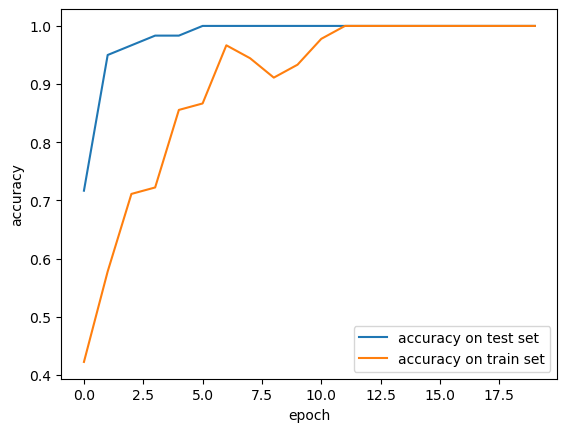

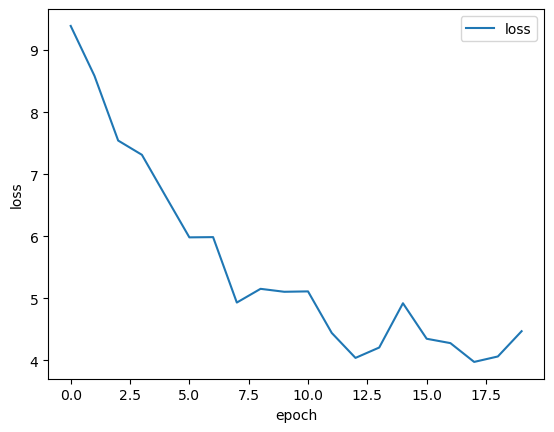

In [18]:
#在IRIS上的实验结果
train_set,train_label,test_set,test_label=IRIS(raw_data)
w=train(train_set,test_set,train_label,test_label,10,20,0.00005,3)

In [19]:
#下面是对mnist的分类
#获取mnist数据集，并将其标准化,这一段是借鉴网上代码
import struct
def get_mnist():
    with open('实验数据集/MNIST/train-images-idx3-ubyte','rb') as fi:
        ImgFile = fi.read()
        head = struct.unpack_from('>IIII', ImgFile, 0)
        #定位数据开始位置
        offset = struct.calcsize('>IIII')
        ImgNum = head[1]
        width = head[2]
        height = head[3]
        #每张图片包含的像素点
        pixel = height*width
        bits = ImgNum * width * height
        bitsString = '>' + str(bits) + 'B'
        #读取文件信息
        images = struct.unpack_from(bitsString, ImgFile, offset)
        #转化为n*726矩阵
        train_set = np.reshape(images,[ImgNum,pixel])
    with open('实验数据集/MNIST/train-labels-idx1-ubyte','rb') as fl:
        LableFile = fl.read()
        head = struct.unpack_from('>II', LableFile, 0)
        labelNum = head[1]
        #定位标签开始位置
        offset = struct.calcsize('>II')
        numString = '>' + str(labelNum) + "B"
        labels = struct.unpack_from(numString, LableFile, offset)
        #转化为1*n矩阵
        labels = np.reshape(labels, [labelNum])
        train_label=labels.reshape(-1,1)
    with open('实验数据集/MNIST/t10k-images-idx3-ubyte','rb') as fi:
        ImgFile = fi.read()
        head = struct.unpack_from('>IIII', ImgFile, 0)
        #定位数据开始位置
        offset = struct.calcsize('>IIII')
        ImgNum = head[1]
        width = head[2]
        height = head[3]
        #每张图片包含的像素点
        pixel = height*width
        bits = ImgNum * width * height
        bitsString = '>' + str(bits) + 'B'
        #读取文件信息
        images = struct.unpack_from(bitsString, ImgFile, offset)
        #转化为n*726矩阵
        test_set = np.reshape(images,[ImgNum,pixel])
    with open('实验数据集/MNIST/t10k-labels-idx1-ubyte','rb') as fl:
        LableFile = fl.read()
        head = struct.unpack_from('>II', LableFile, 0)
        labelNum = head[1]
        #定位标签开始位置
        offset = struct.calcsize('>II')
        numString = '>' + str(labelNum) + "B"
        labels = struct.unpack_from(numString, LableFile, offset)
        #转化为1*n矩阵
        labels = np.reshape(labels, [labelNum])
        test_label=labels.reshape(-1,1)
    return train_set,train_label,test_set,test_label

In [20]:
#标准化，借鉴网上代码
def normalize(train_set,test_set):
    mean = np.mean(train_set, axis=0).reshape(1,-1)
    #var = np.var(train_set, axis=0).reshape(1,-1)
    #train_set = (train_set-mean)/np.sqrt(var)
    train_set = train_set-mean

    mean = np.mean(test_set, axis=0).reshape(1,-1)
    #var = np.var(test_set, axis=0).reshape(1,-1)
    #test_set = (test_set-mean)/np.sqrt(var)
    test_set = test_set-mean

    return train_set,test_set

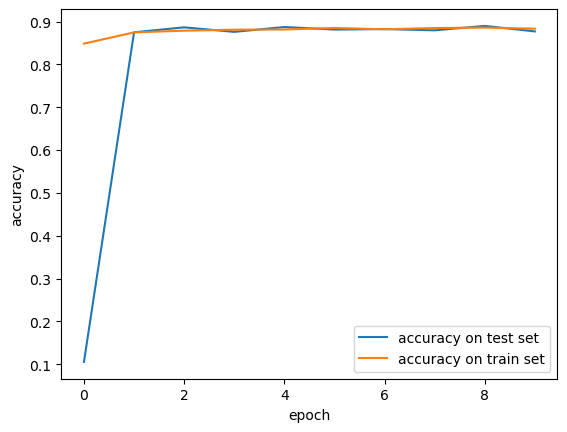

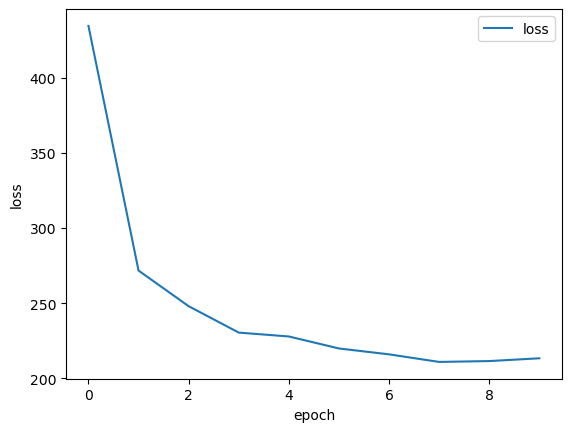

In [21]:
train_set,train_label,test_set,test_label=get_mnist()
ones1=np.ones((train_set.shape[0],1))
ones2=np.ones((test_set.shape[0],1))
train_set=np.concatenate((ones1,train_set),axis=-1)
test_set=np.concatenate((ones2,test_set),axis=-1)
train_set,test_set=normalize(train_set,test_set)
w=train(train_set,test_set,train_label,test_label,256,10,0.0005,10)

(1, 10)
(1, 10)


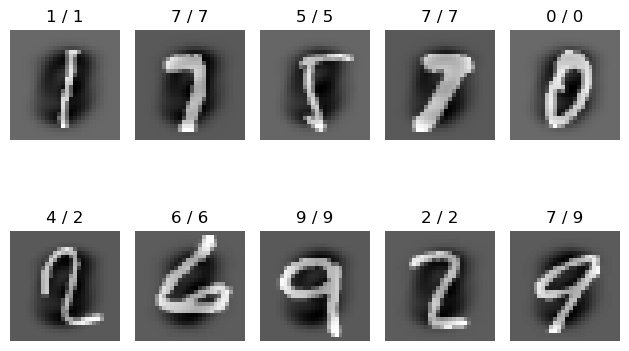

In [23]:
#抽十个展示
idx=np.random.choice(test_set.shape[0],10,False)
example=test_set[idx,:]
label=test_label[idx,:]
predict=softmax(example,w)
prediction=np.argmax(predict,axis=-1).reshape(1,-1)
print(prediction.shape)
gt=np.transpose(label)
print(gt.shape)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title('%i / %i'%(prediction[0,i],gt[0,i]))
    plt.imshow(example[i,1:].reshape(28,28),cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()